## Creating Histograms

In the cells below I import packages, import the summary citation dataset, and create indicator variables for external and abrupt patents. Then histograms and summary statistics are created for the following categories: internal incremental, internal abrupt, and external abrupt.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#Setting plot colors
cmap1 = matplotlib.cm.get_cmap('summer')
%matplotlib notebook

In [2]:
#Loading data as a pandas dataset
data2 = pd.read_csv('cit_external_comn_share.csv', sep = ',', header = 0, index_col = 0)
#Deleting patents before 1976
data2 = data2[data2.appyear > 1975]

C:\Users\Scott\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [49]:
data2['external_share'] = data2.external_share.replace(np.nan, -1)

In [50]:
#This function will be used to determine whether a patent is abrupt or incremental. A patent with over 200 expected citations
  #is set to be aprupt
def abrupt(cites):
    #The cutoff value that defines an abrupt innovation can be adjusted
    cutoff = 100
    if cites >= cutoff:
        return 0
    else:
        return 1
    
#Creating a new column for the indicator variable 'incremental'
data2['Increment'] = data2['tot_cit_correct'].apply(abrupt)

#Defining External Patents
#The definition will depend on the share of citations that are external.
#That variable has many missing values for patents with no citations. This line replaces those missing values with -1. 
data2['external_share'] = data2.external_share.replace(np.nan, -1)
#Now I define a function to determine whether a patent is external
def external(cites):
    cutoff = 0.5
    if cites >= cutoff:
        return 1
    else:
        return 0
data2['External'] = data2['external_share'].apply(external)

<IPython.core.display.Javascript object>


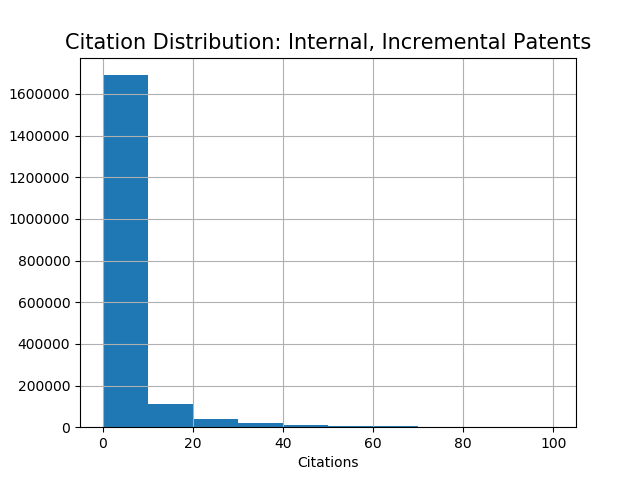

Total, mean, standard deviation: 1887100 , 3.4091652696204644 , 9.10248846074226


<IPython.core.display.Javascript object>


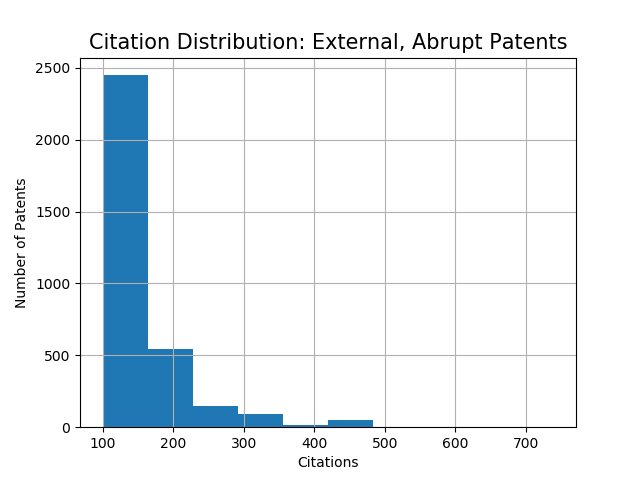

Total, mean, standard deviation: 3306 , 152.47158762855364 , 66.45862283631533


<IPython.core.display.Javascript object>


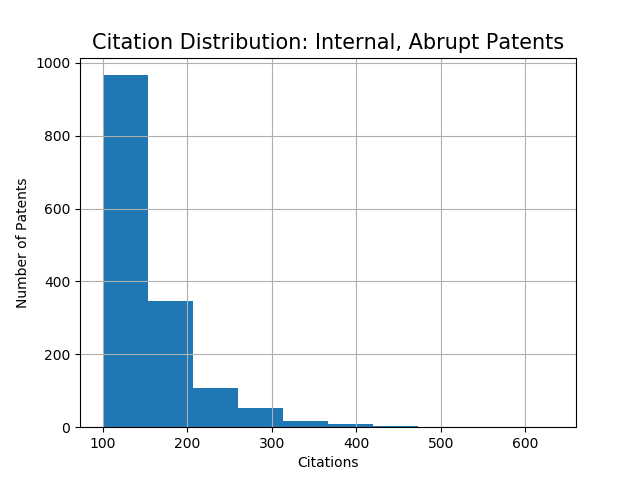

Total, mean, standard deviation: 1504 , 152.81663630319144 , 56.911589019723195
Summary Statistics for "External, incremental patents: 
Total, mean, standard deviation: 432153 , 11.030193920172763 , 13.571278995560847


In [67]:
#data3 = data2[data2.icl_class == 'G01N']
#data3.hist(column = 'appyear')

#Plotting internal incremental innovation
#Eliminated observations that are not internal incremental
data3 = data2[data2.Increment == 1]
data3.hist(column = 'tot_cit_correct')
plt.title('Citation Distribution: Internal, Incremental Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
#Printing out summary statistics
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',', np.std(data3.tot_cit_correct))

#External Abrupt innovation
data3 = data2[(data2.Increment == 0) & (data2.External == 1)]
data3.hist(column = 'tot_cit_correct')
plt.title('Citation Distribution: External, Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',', np.std(data3.tot_cit_correct))

#Internal abrupt innovation
data3 = data2[(data2.Increment == 0) & (data2.External == 0)]
data3.hist(column = 'tot_cit_correct')
plt.title('Citation Distribution: Internal, Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',', np.std(data3.tot_cit_correct))

#Printing the amount of observations that would be "external incremental"
data3 = data2[(data2.Increment == 1) & (data2.External == 1)]
print('Summary Statistics for "External, incremental patents: ')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',', np.std(data3.tot_cit_correct))

## Junk Code

The cells below do the following things, which might eventually be of use to us:
1. This lists the classifications in order of number of patents.
2. This is an attempt to determine for each patent how many years was the last abrupt patent within its classification. The code works, but it takes to long to run on my computer. It's also incomplete.
3. This cell imports the patent evolution dataset.

In [68]:
#This line finds the most common classifications
data2['icl_class'].value_counts()

In [19]:
#This cell was meant to create a column for how what step each patent was at in its product line's innovation path.
#The code works, but it takes too long to run on my computer.


#Sorting the values by class, then by year, then by the variable "Increment". The loop below needs 
  #abrupt patents from the same class and year to be listed above incremental ones.
data2 = data2.sort_values(['icl_class', 'appyear', 'Increment'])
#Resetting the index of the dataframe so the first row is labeled "0"
data2 = data2.reset_index(drop = True)
#Creating a new column for the year of the latest abrupt patent within a patent's classification. For now this
  #variable is set equal to negative one. The loop below fills it with the correct values.
data2['year_latest_abrupt'] = (data2['patent']*0) - 1

#This moves through every row of the dataset and sets the 'year_latest_abrupt' variable
for i in range(1, int(len(data2)/10)):
    #If the patent is abrupt, then 'year_latest_abrupt" is just equal to that patent's application year
    if data2.loc[i, 'Increment'] == 0:
        data2.loc[i, 'year_latest_abrupt'] = data2.loc[i, 'appyear']
    #If the patent is incremental, I set 'year_latest_abrupt to be equal to the previous row's 'year_latest_abrupt',
        #but only if the previous observation is within the same classification.
    elif data2.loc[i, 'icl_class'] == data2.loc[i-1, 'icl_class']:
        data2.loc[i, 'year_latest_abrupt'] = data2.loc[i-1, 'year_latest_abrupt']
#By the end of this loop, the variable 'year_latest_abrupt' should be correct. For patent's that we don't know the
  #year of the latest abrupt patent in its classification, 'year_latest_abrupt should be equal to negative one.

KeyboardInterrupt: 

In [26]:
#Loading data as a pandas dataset
cols = np.append((0, 1, 2), np.arange(30, 61))
data = pd.read_csv('aux_cit_evolution_year_count_df.csv', sep = ',', header = 0, index_col = 0, usecols = cols)
data = data[data.appyear > 1975]
data = data.replace(np.nan, 0)